In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.datasets import cifar10
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras import optimizers

In [2]:
(X_train, Y_train) , (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [5]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [7]:
convolutional_base = ResNet101(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

171446536/171446536 [==============================] - 1s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                   

In [8]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((8,8)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [9]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [10]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1407/1407 [==============================] - 1043s 700ms/step - loss: 1.5128 - acc: 0.5101 - val_loss: 0.6028 - val_acc: 0.8534
Epoch 2/10
1407/1407 [==============================] - 999s 710ms/step - loss: 0.8206 - acc: 0.7785 - val_loss: 0.3641 - val_acc: 0.9166
Epoch 3/10
1407/1407 [==============================] - 987s 702ms/step - loss: 0.5685 - acc: 0.8722 - val_loss: 0.2540 - val_acc: 0.9414
Epoch 4/10
1407/1407 [==============================] - 989s 703ms/step - loss: 0.4235 - acc: 0.9154 - val_loss: 0.2247 - val_acc: 0.9434
Epoch 5/10
1407/1407 [==============================] - 997s 709ms/step - loss: 0.3245 - acc: 0.9424 - val_loss: 0.1951 - val_acc: 0.9486
Epoch 6/10
1407/1407 [==============================] - 986s 701ms/step - loss: 0.2491 - acc: 0.9604 - val_loss: 0.1957 - val_acc: 0.9446
Epoch 7/10
1407/1407 [==============================] - 999s 710ms/step - loss: 0.2038 - acc: 0.9694 - val_loss: 0.1949 - val_acc: 0.9476
Epoch 8/10
1407/1407 [===========

In [21]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 62s 196ms/step - loss: 0.2122 - acc: 0.9497
Test Accuracy = 0.9496999979019165


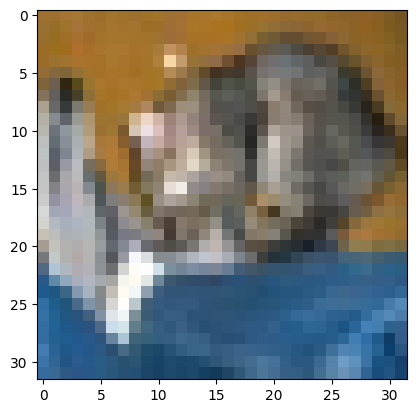

In [12]:
plt.imshow(X_test_scaled[0])
plt.show()

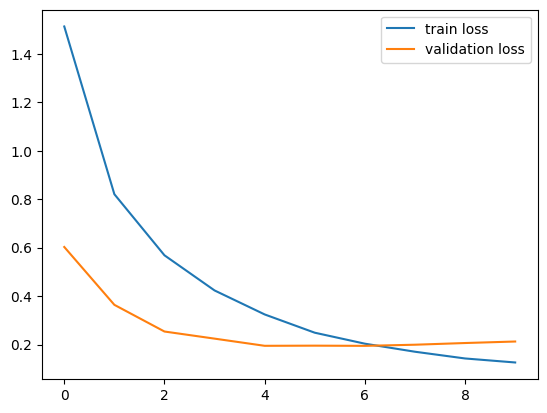

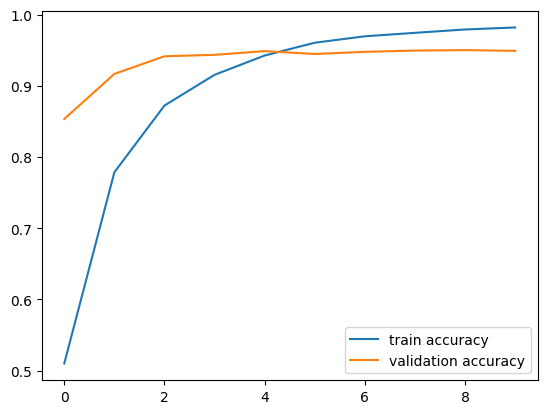

In [23]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [14]:
model.save("resnet101_keras_94.97.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
predictions = model.predict(X_test_scaled)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 62s 194ms/step


In [18]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy = accuracy_score(predicted_labels, Y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 94.97%


In [30]:
np.save('Y_Resnet101_base.npy', predicted_labels)